In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.warn('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2727837967.py:6: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
pd.set_option('display.max_columns',135 )
data = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding="latin1")

data.head()

/tmp/ipykernel_20/519319754.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
def missing_values_table(df):

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)
        

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        

        return mis_val_table_ren_columns

missing_values= missing_values_table(data)
missing_values.style.background_gradient(cmap='Greens')

Your selected dataframe has 135 columns.
There are 106 columns that have missing values.


,Missing Values,% of Total Values
gsubname3,181671,100.000000
weapsubtype4,181621,100.000000
weapsubtype4_txt,181621,100.000000
weaptype4,181618,100.000000
weaptype4_txt,181618,100.000000
claimmode3,181558,99.900000
claimmode3_txt,181558,99.900000
gsubname2,181531,99.900000
claim3,181373,99.800000
guncertain3,181371,99.800000


In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [6]:
data = data[['Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
data['Motive'] = data['Motive'].fillna('Ambiguous')
data['Summary'] = data['Summary'].fillna('Not Recorded')

In [8]:
data.isna().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
state            421
city             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary            0
Group              0
Target_type        0
Weapon_type        0
Motive             0
dtype: int64

In [9]:
data2 =data.dropna(axis = 0)

**Exploratory Data Analysis on Terrorism Dataset**

Top 10 countries with highest number of attacks

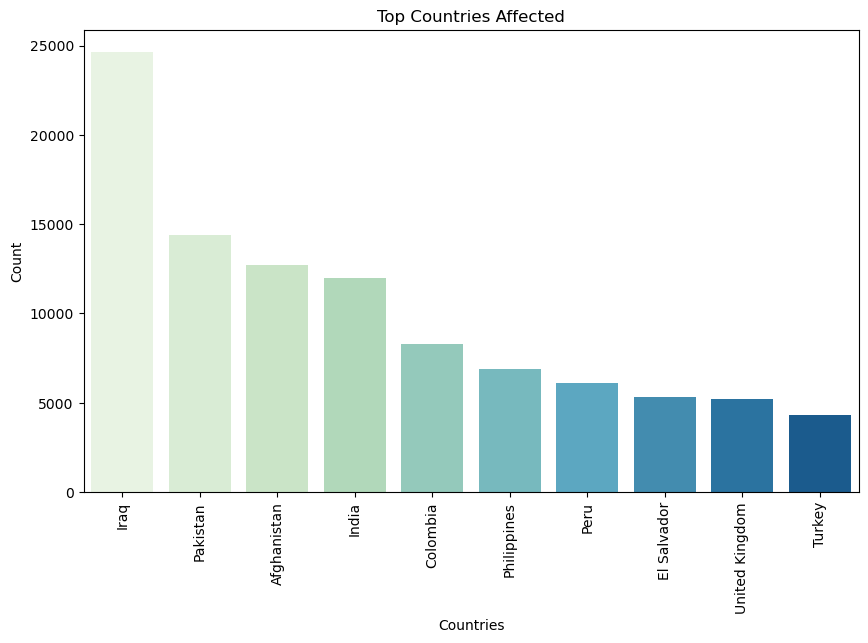

In [10]:
plt.subplots(figsize=(10,6))
top_countries = data['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Attacks_Count']
sns.barplot(x='Country', y='Attacks_Count', data=top_countries, palette='GnBu')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

Region wise attacks

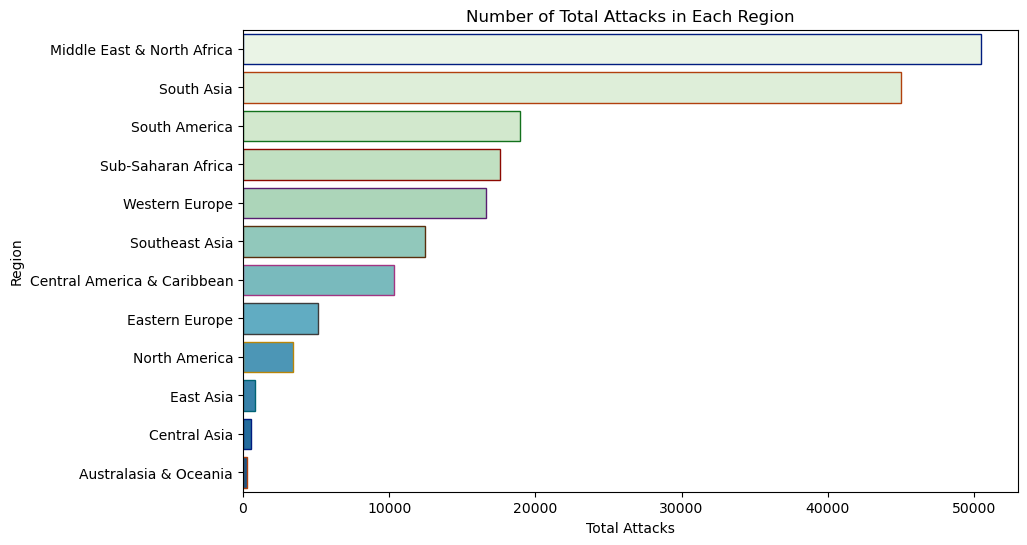

In [11]:
region_attacks =data.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(10,6))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, palette='GnBu', edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

In [12]:
groups = data[['AttackType','Group','Weapon_type','Target_type']]

In [13]:
region_attack_counts = data2.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

region = data2.Region.unique()

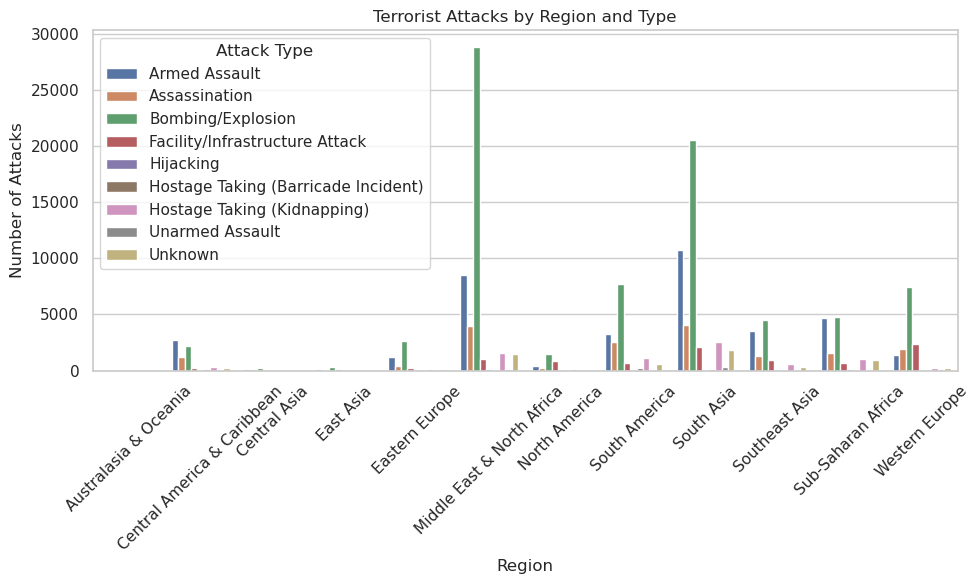

In [14]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(data=region_attack_counts, x='Region', y='Attack Count', hue='AttackType')
plt.title('Terrorist Attacks by Region and Type')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [15]:
groups = data[['AttackType','Group','Weapon_type','Target_type']]

In [16]:
group_counts = groups['Group'].value_counts()

sorted_groups = group_counts.sort_values(ascending=False)

sorted_groups = sorted_groups.iloc[1:]
top_10_groups = sorted_groups.head(10)

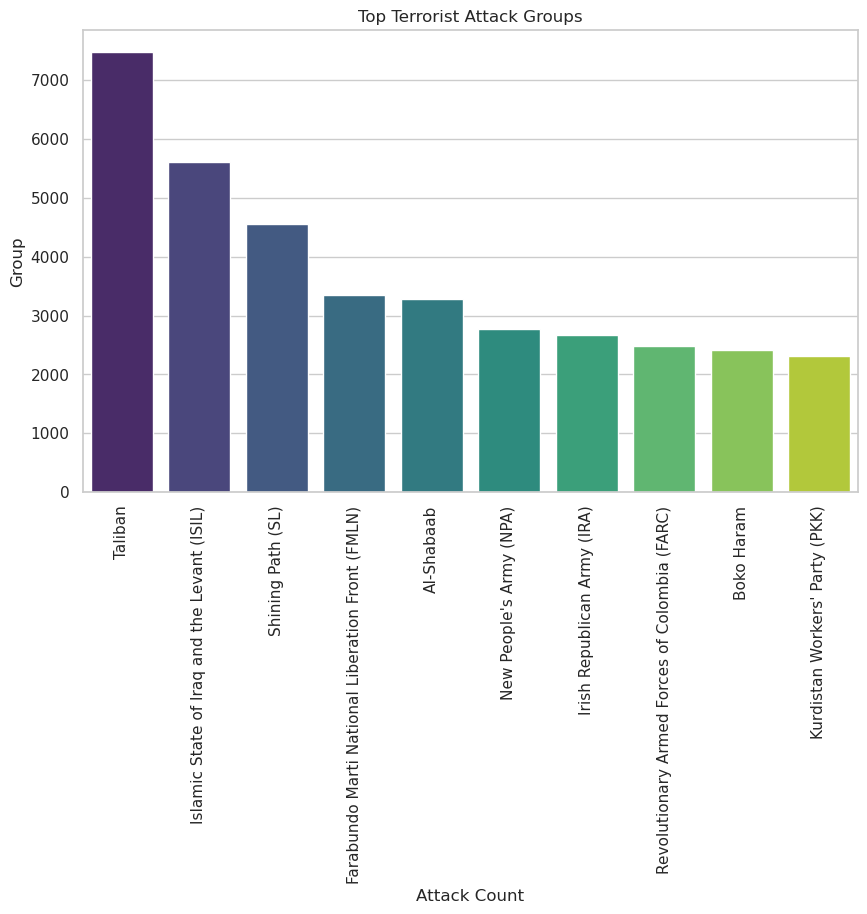

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_groups.index, y=top_10_groups.values, palette="viridis")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

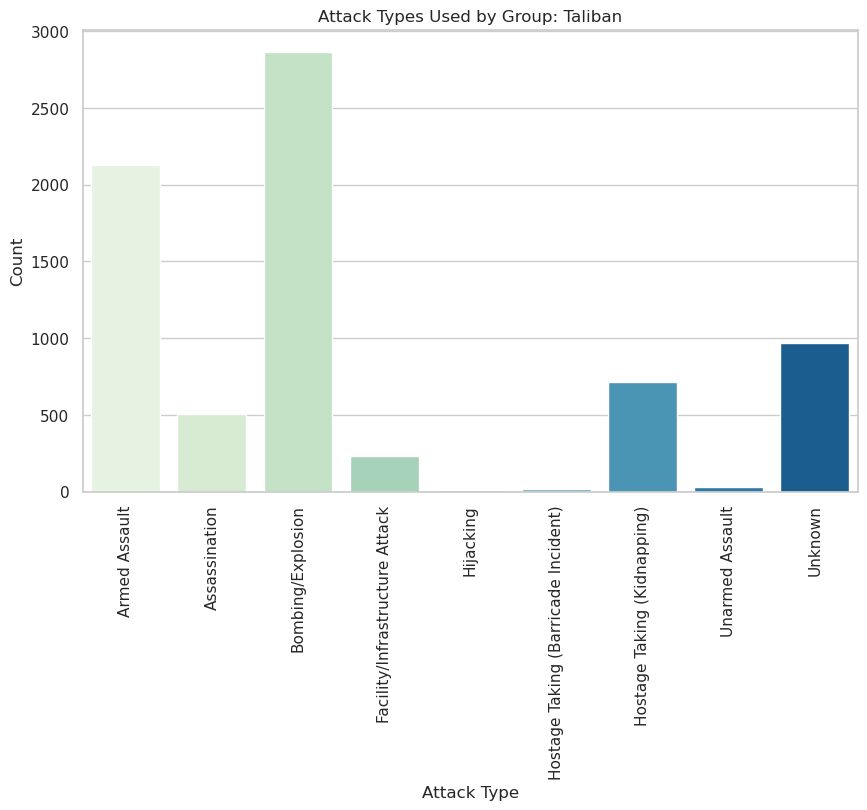

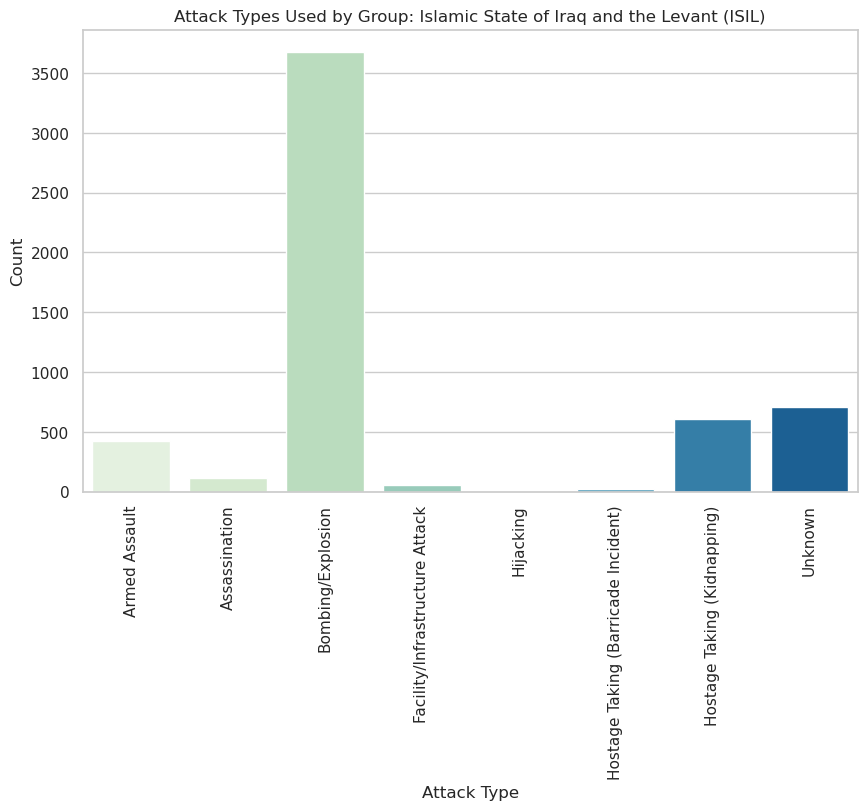

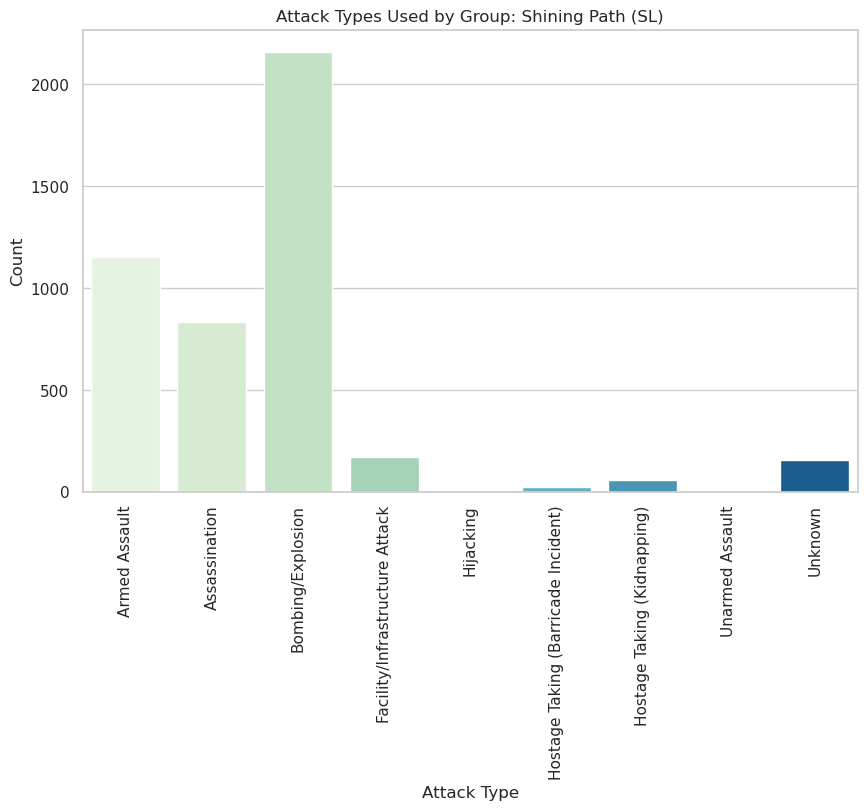

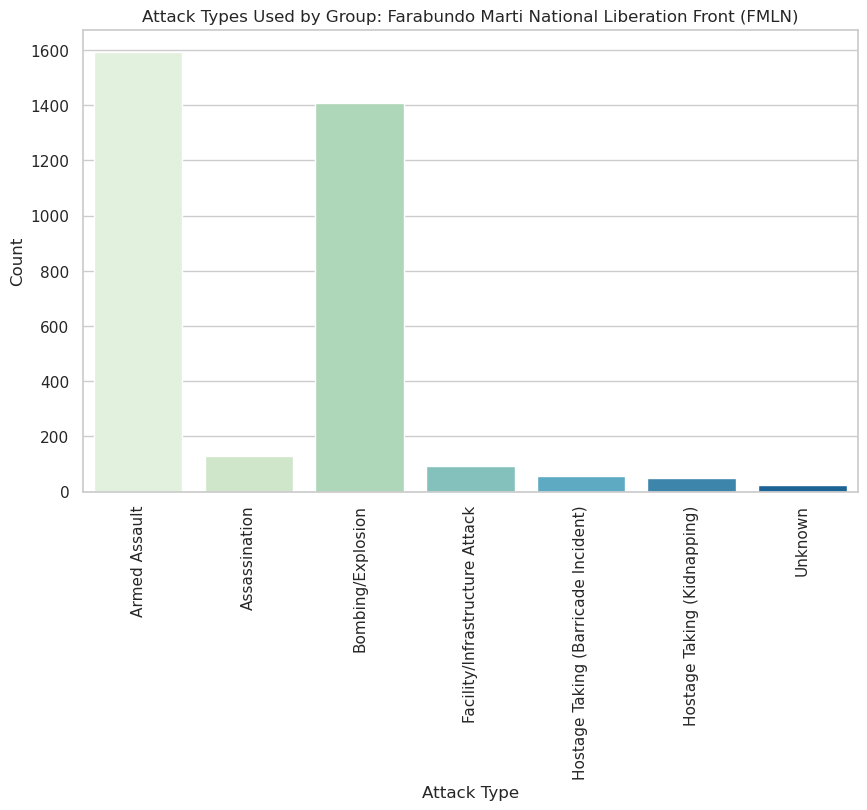

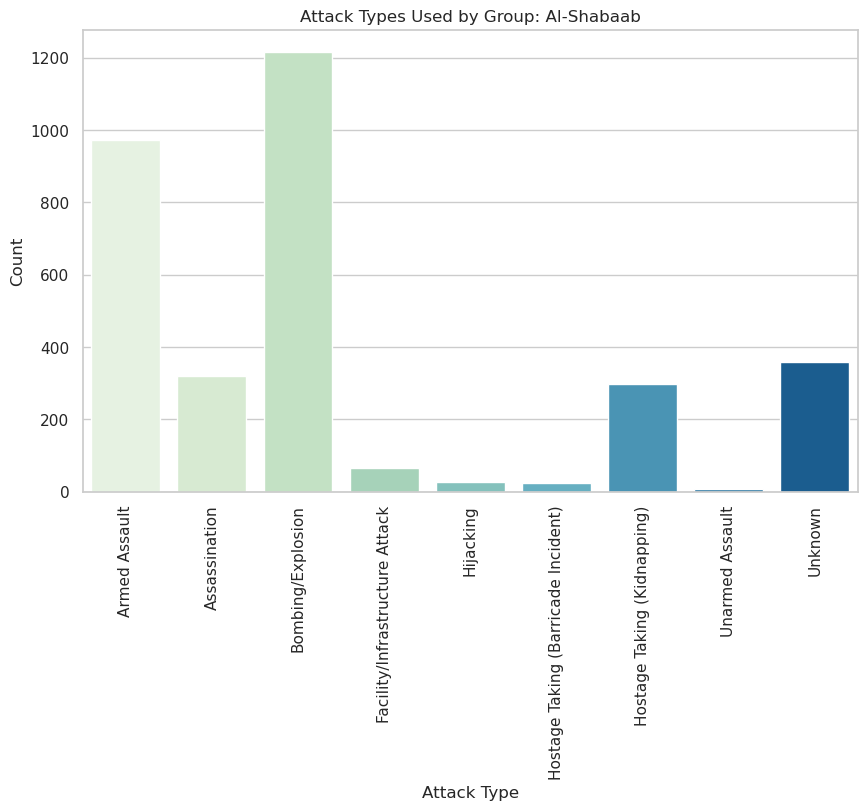

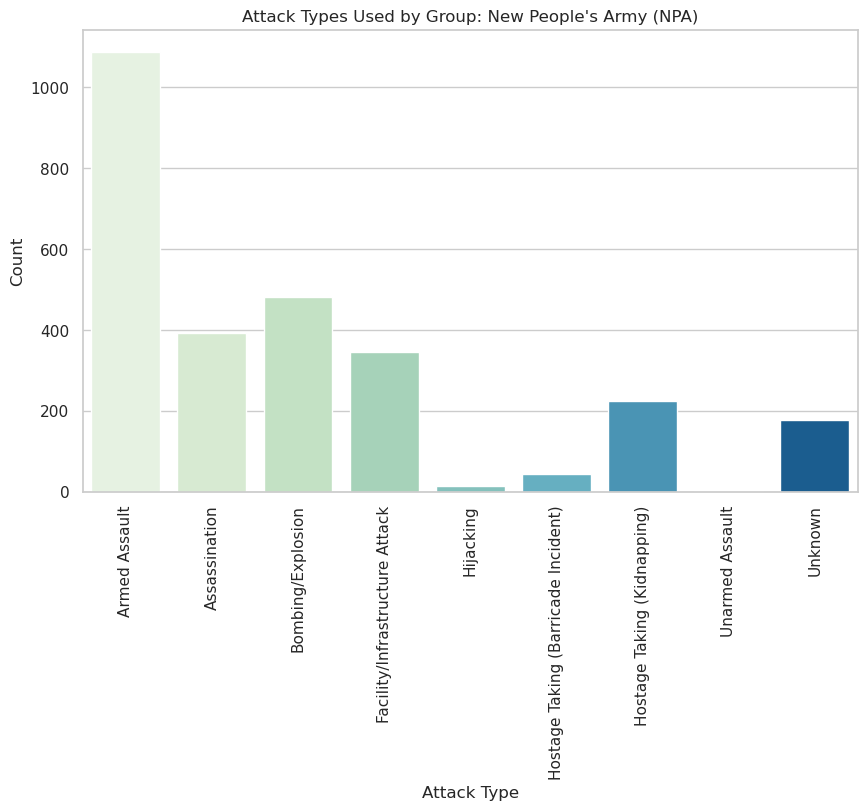

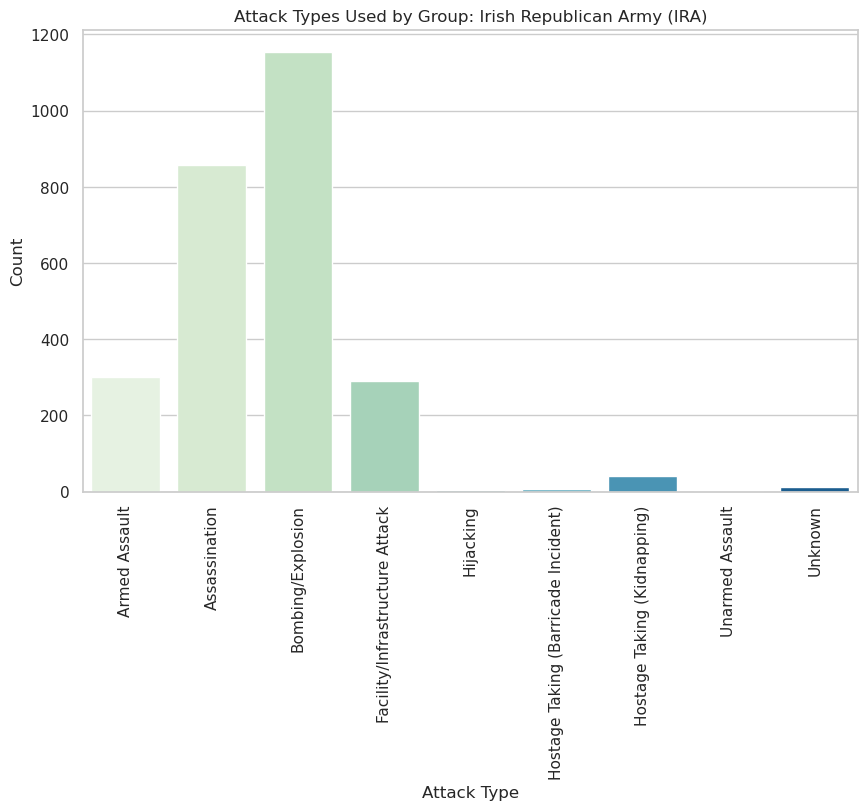

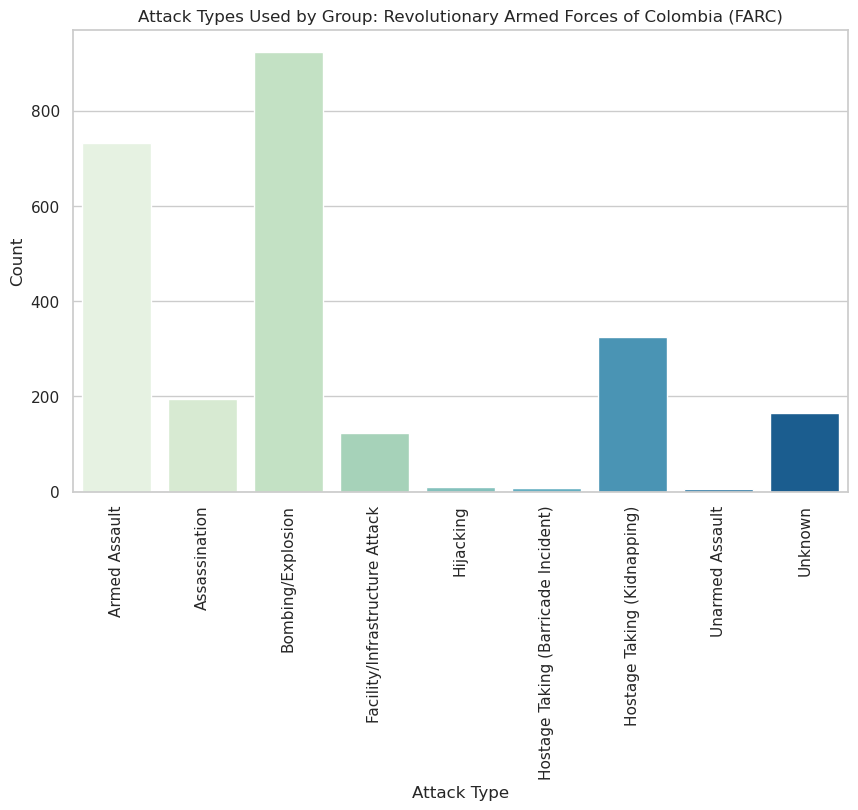

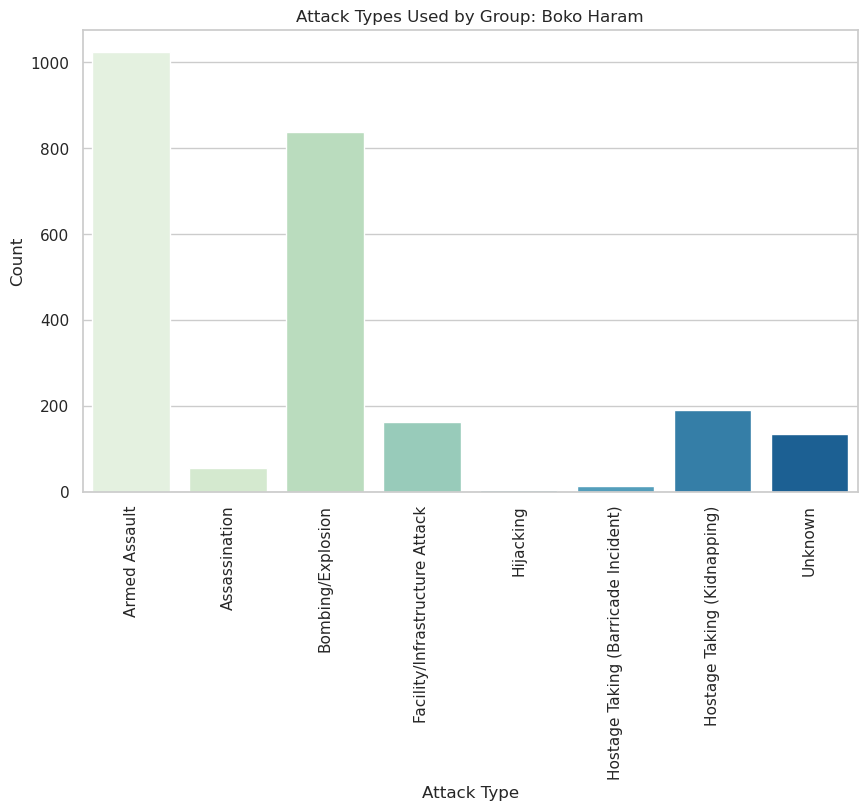

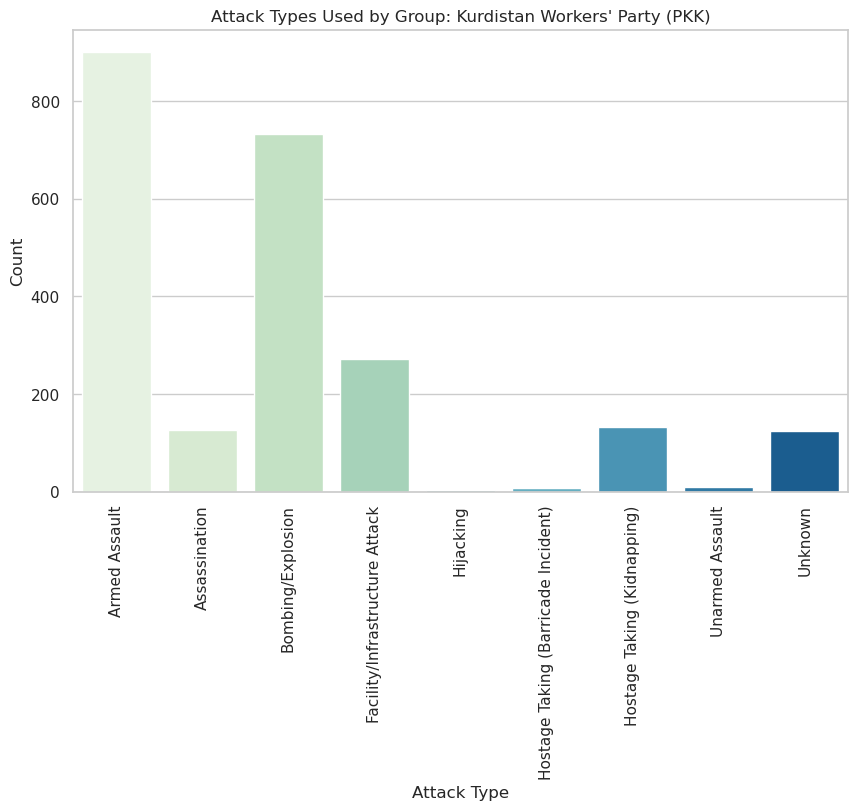

In [18]:
grouped_data = groups.groupby(['Group', 'AttackType']).size().reset_index(name='Count')

groups_name= sorted_groups.index[:10]

for group_name in groups_name:
    plt.figure(figsize=(10, 6))
    
    group_data = grouped_data[grouped_data['Group'] == group_name]
    
    sns.barplot(x=group_data['AttackType'], y = group_data['Count'],palette='GnBu')
    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.title(f'Attack Types Used by Group: {group_name}')
    plt.xticks(rotation=90)
    plt.show()

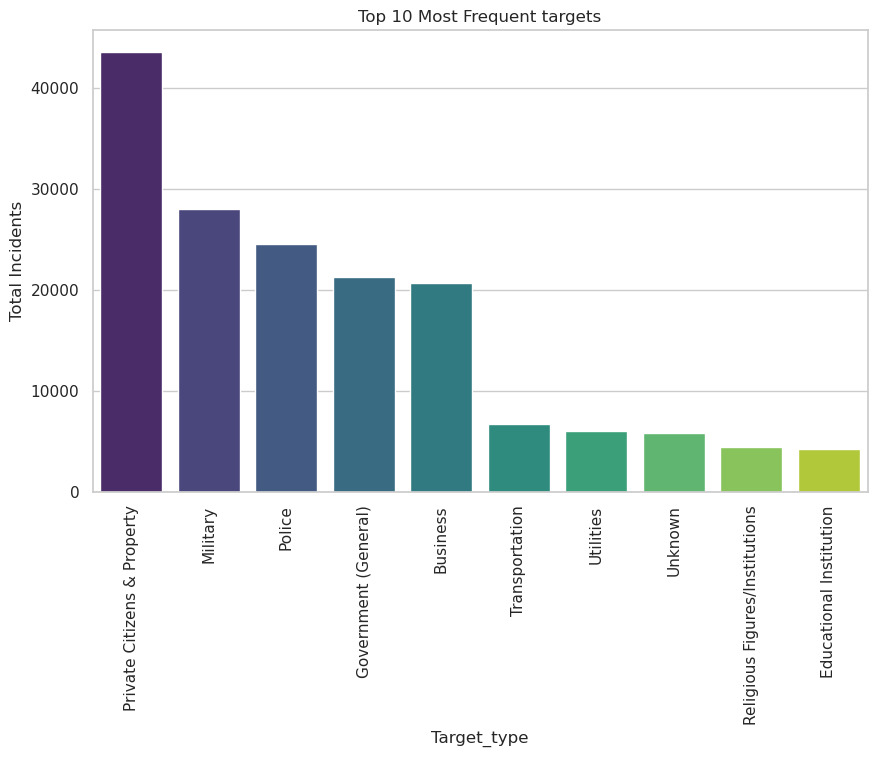

In [19]:
target_counts = groups['Target_type'].value_counts()
sorted_Target= target_counts.sort_values(ascending=False)

top_10_groups = sorted_Target.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_groups.index, y=top_10_groups.values,palette='viridis')
plt.xlabel('Target_type')
plt.ylabel('Total Incidents')
plt.title('Top 10 Most Frequent targets')
plt.xticks(rotation=90)
plt.show()

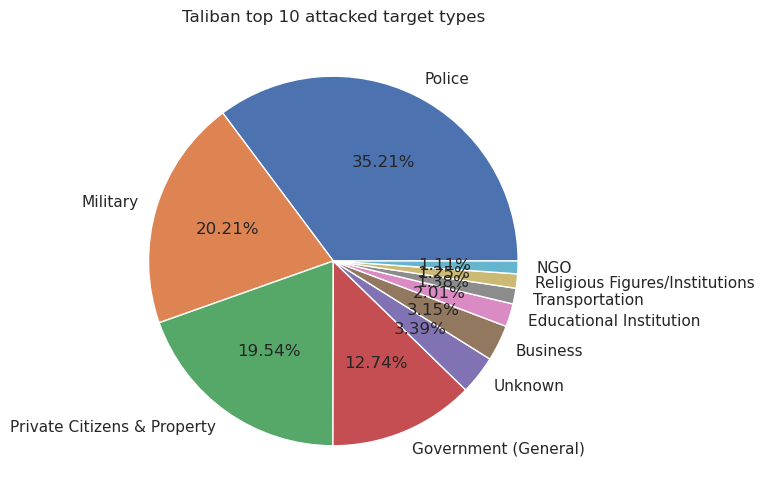

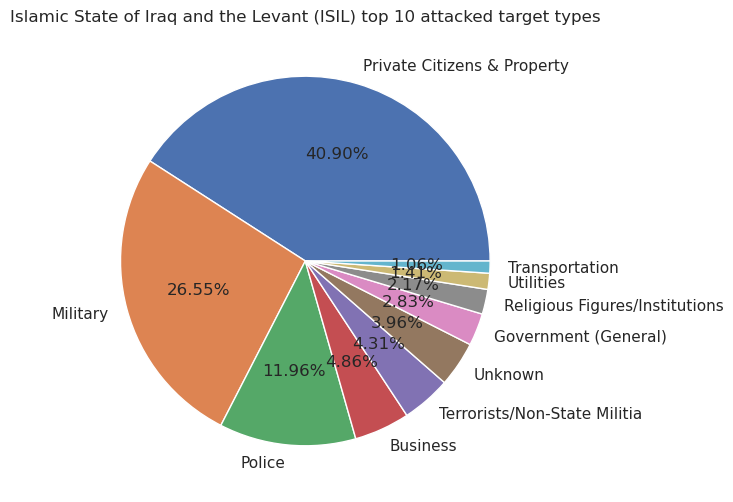

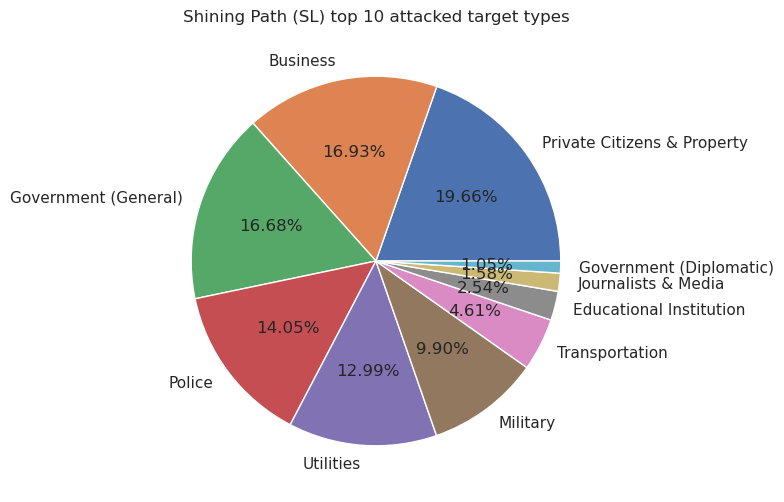

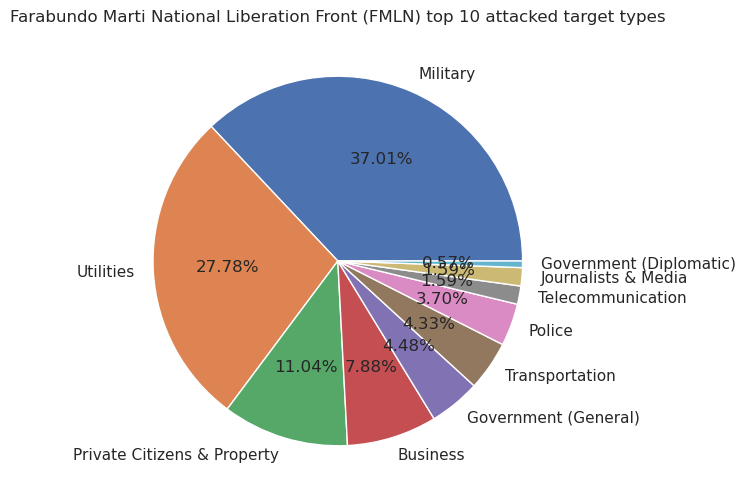

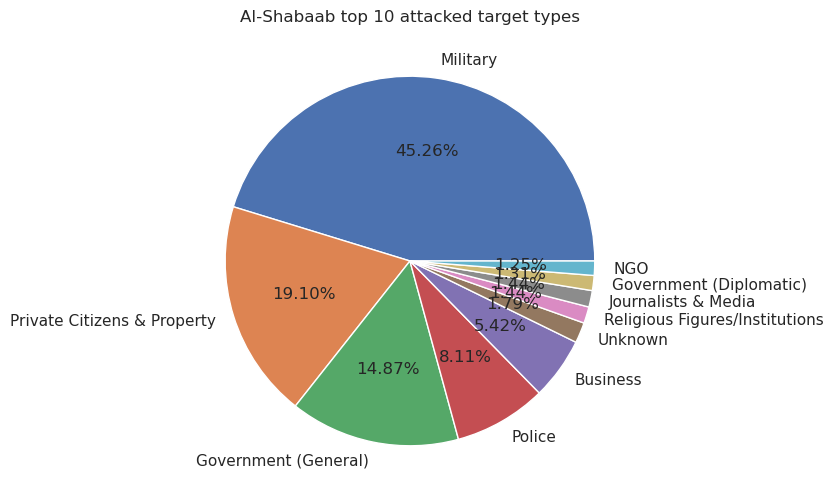

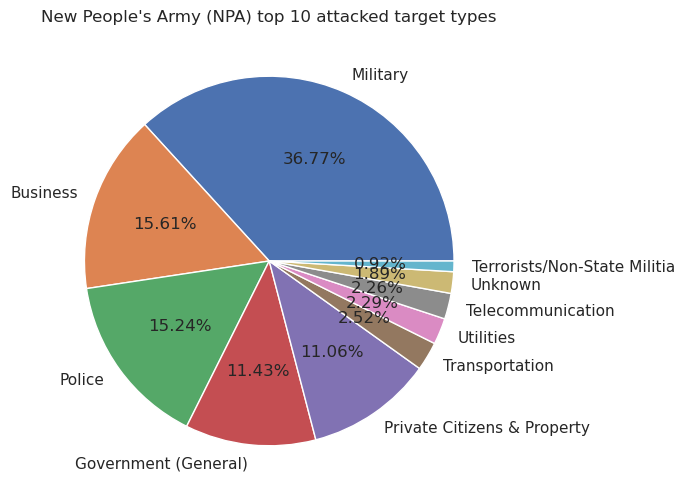

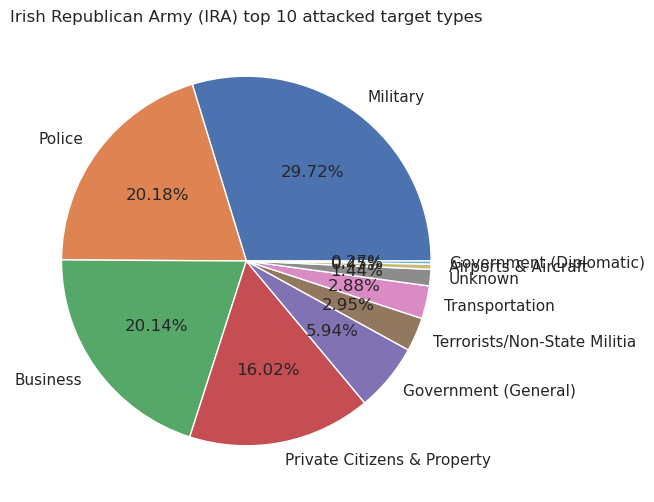

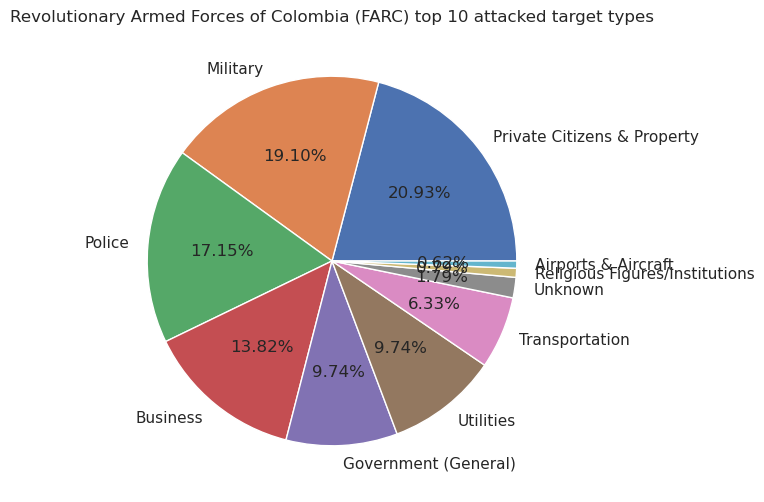

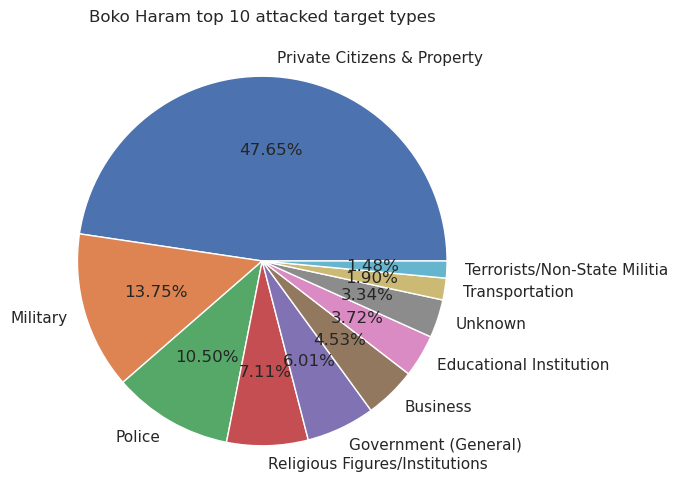

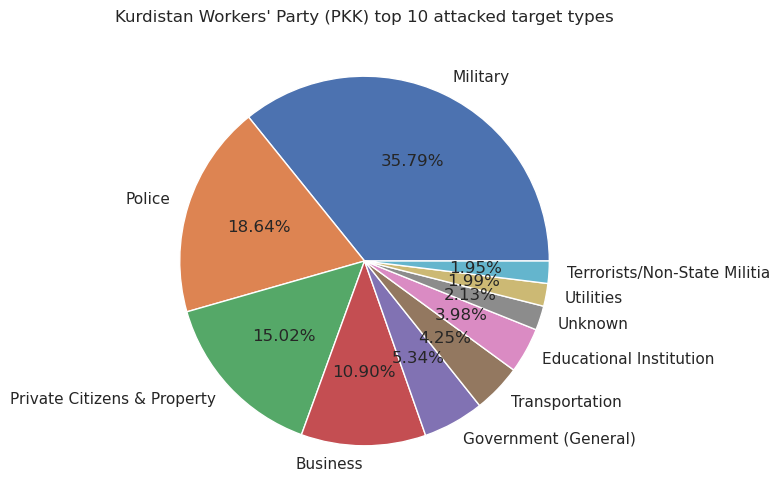

In [20]:
def top_target():
    grouping = groups.groupby(['Group'])
    for group_name in groups_name:
        grouping.get_group(group_name)
        sort_taliban = grouping.get_group(group_name)['Target_type'].value_counts().sort_values(ascending = False)

        #plot a graph
        plt.figure(figsize=(12,6))
        plt.pie(sort_taliban[:10].values,labels=sort_taliban[:10].index,autopct = '%.2f%%')
        plt.title(f"{group_name} top 10 attacked target types")
        plt.show()
top_target()

In [21]:
groups['Casualties'] = data['Killed']+data['Wounded']
groups['Year'] = data['Year']
groups['Casualties'].fillna(-1,inplace = True)

/tmp/ipykernel_20/4049167476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groups['Casualties'] = data['Killed']+data['Wounded']
/tmp/ipykernel_20/4049167476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groups['Year'] = data['Year']
/tmp/ipykernel_20/4049167476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
groups['Casualties']

0         1.0
1         0.0
2         1.0
3        -1.0
4        -1.0
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Casualties, Length: 181691, dtype: float64

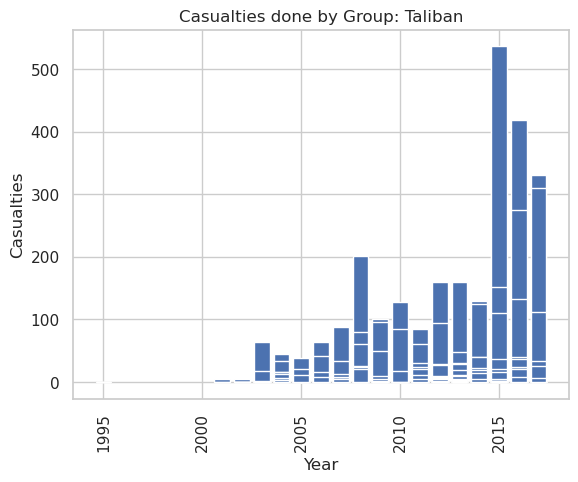

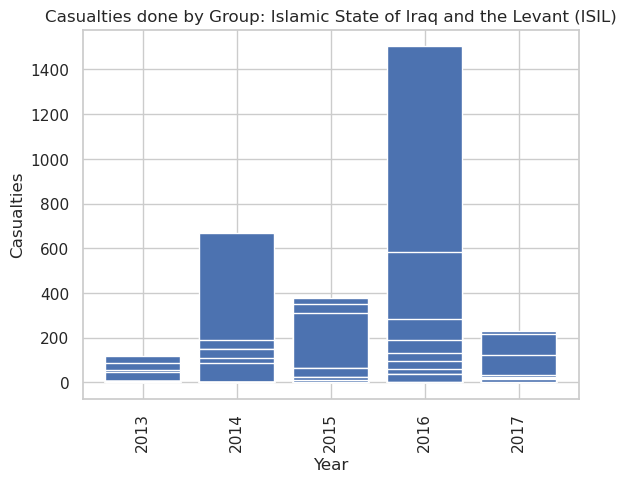

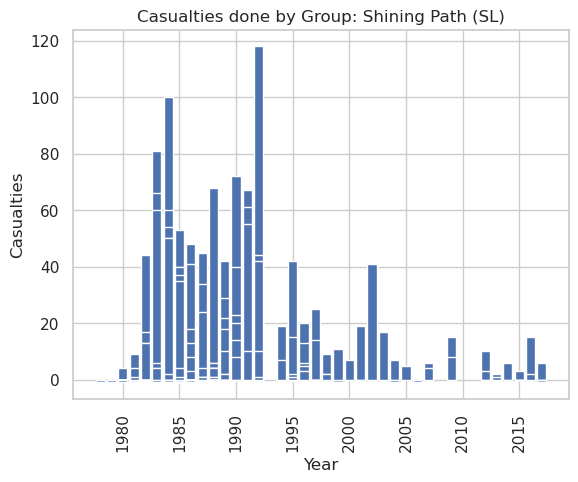

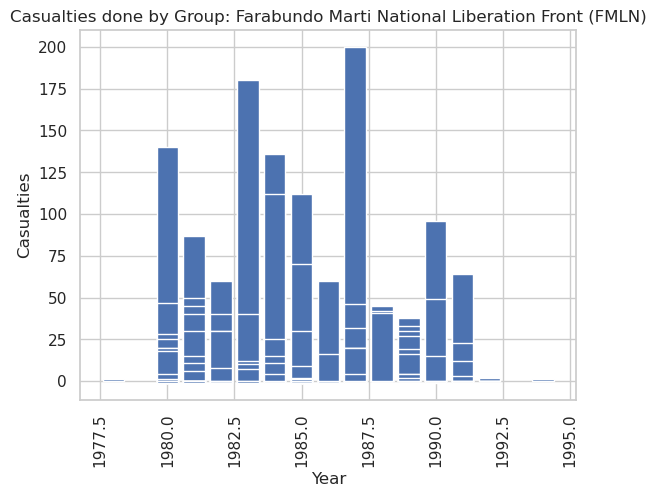

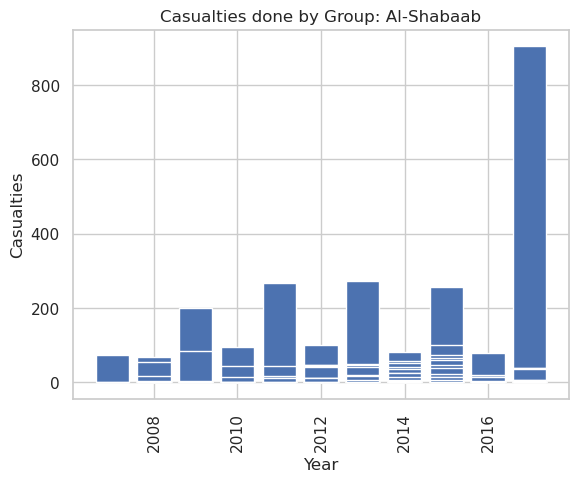

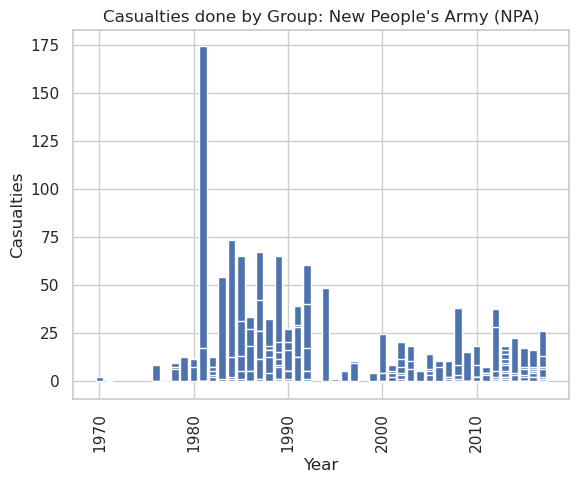

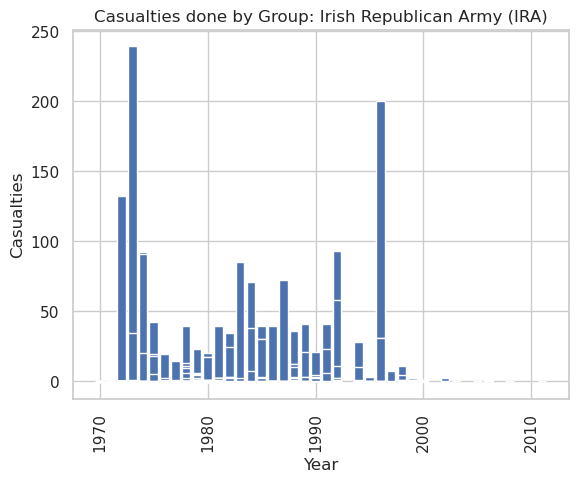

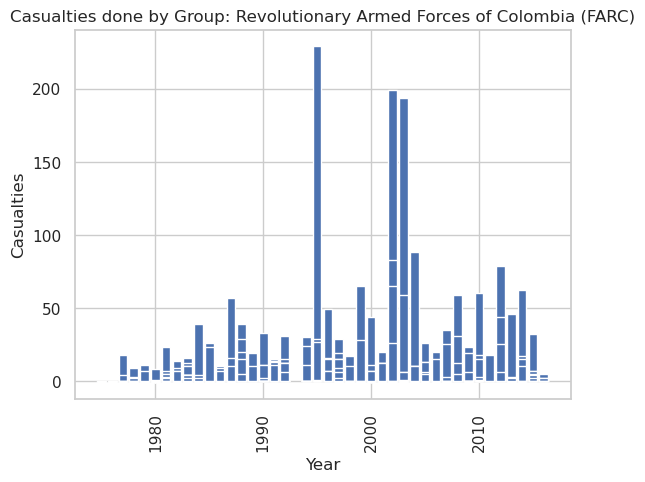

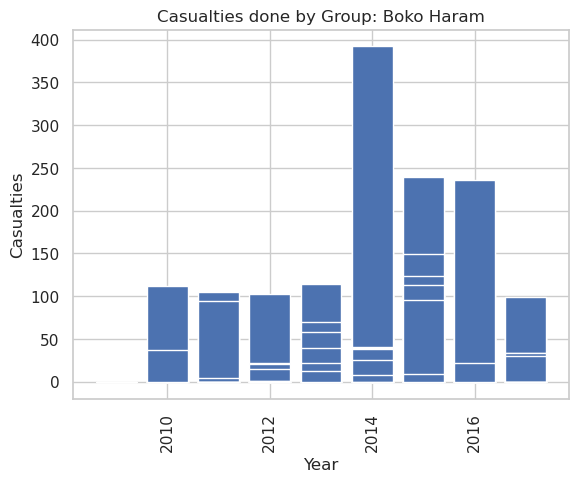

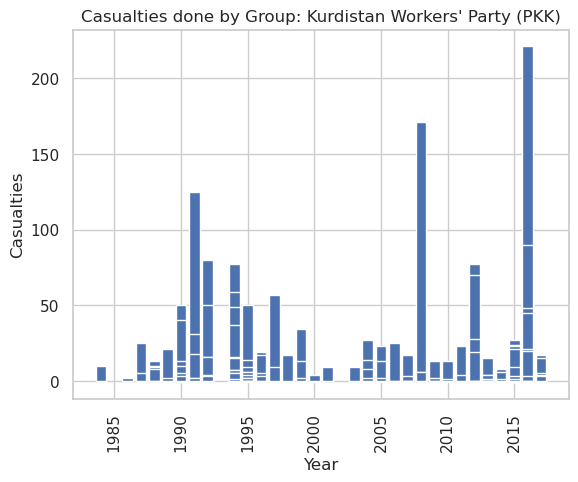

In [23]:
def casulty_year_group():
    grouping = groups.groupby(['Group'])
    for group_name in groups_name:

        group_data = grouping.get_group(group_name)
    
        plt.bar(group_data['Year'], group_data['Casualties'])
        plt.xlabel('Year')
        plt.ylabel('Casualties')
        plt.title(f'Casualties done by Group: {group_name}')
        plt.xticks(rotation=90)
        plt.show()
casulty_year_group()